# Analysis on HR Analytics on employee Attrition rate

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
HR = pd.read_csv("C:\\Users\\manjunath.d\\Desktop\\HR_comma_sep.csv")

In [61]:
HR_DICT = pd.read_csv("C:\\Users\\manjunath.d\\Desktop\\HR- DATA DICTIONARY.csv")

In [3]:
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [63]:
HR_DICT.head()

,Data dictionary,Unnamed: 1
0,NaN,NaN
1,satisfaction_level,Emplyee staisfaction rate from a scale of 0-10
2,last_evaluation,Lat Perfomance evaluation of an emplyee by HR ...
3,number_project,How many projects did the employee completed
4,average_montly_hours,Avg monthy hours spend by an employee


In [4]:
HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [7]:
HR.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [8]:
HR.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
HR.shape

(14999, 10)

# Data Exploration

In [15]:
HR.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

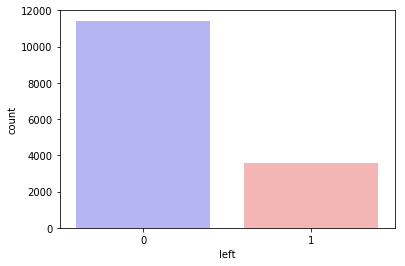

In [16]:
sns.countplot(x="left", data=HR, palette="bwr")
plt.show()

In [19]:
Notleft = len(HR[HR.left == 1])
left = len(HR[HR.left == 0])
print("Percentage of Emplyee Haven't Left the Org: {:.2f}%".format((Notleft / (len(HR.left))*100)))
print("Percentage of Emplyee Left the Org: {:.2f}%".format((left / (len(HR.left))*100)))

Percentage of Emplyee Haven't Left the Org: 23.81%
Percentage of Emplyee Left the Org: 76.19%


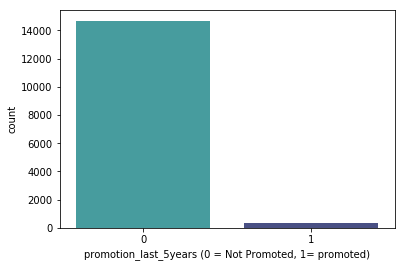

In [21]:
sns.countplot(x='promotion_last_5years', data=HR, palette="mako_r")
plt.xlabel("promotion_last_5years (0 = Not Promoted, 1= promoted)")
plt.show()

# Insight

Emp has the highest rate who have left the organization who havent received the promotion for last 5 years

In [22]:
HR.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


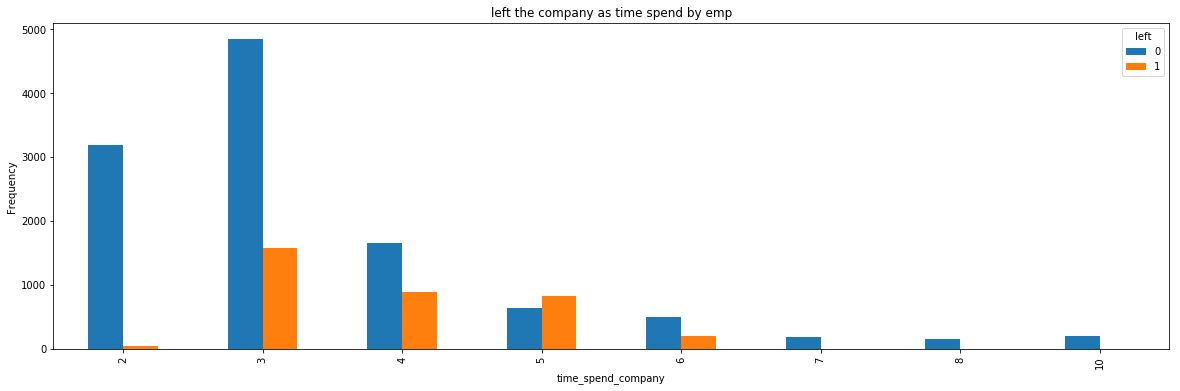

In [26]:
pd.crosstab(HR['time_spend_company'],HR.left).plot(kind="bar",figsize=(20,6))
plt.title('left the company as time spend by emp')
plt.xlabel('time_spend_company')
plt.ylabel('Frequency')
plt.savefig('leftandtimespent.png')
plt.show()

# Insight

Emp who have spent more years (greater than 6 years) have not left the organisation

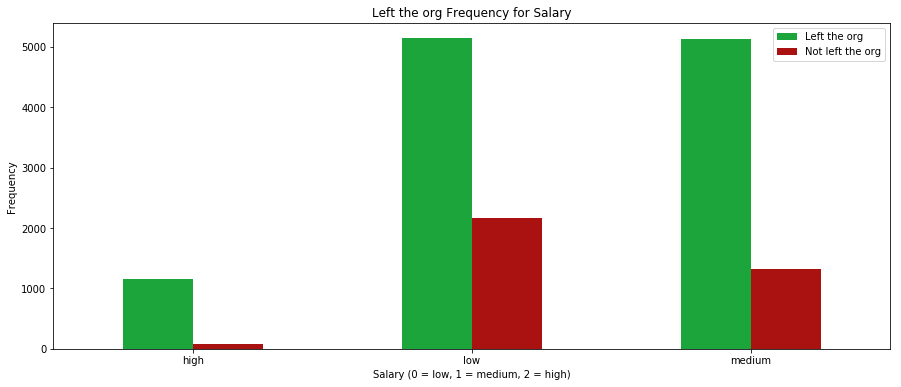

In [27]:
pd.crosstab(HR.salary,HR.left).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Left the org Frequency for Salary')
plt.xlabel('Salary (0 = low, 1 = medium, 2 = high)')
plt.xticks(rotation=0)
plt.legend(["Left the org", "Not left the org"])
plt.ylabel('Frequency')
plt.show()

# Insight
 Emp have left the company who are in the salary bracket low and medium

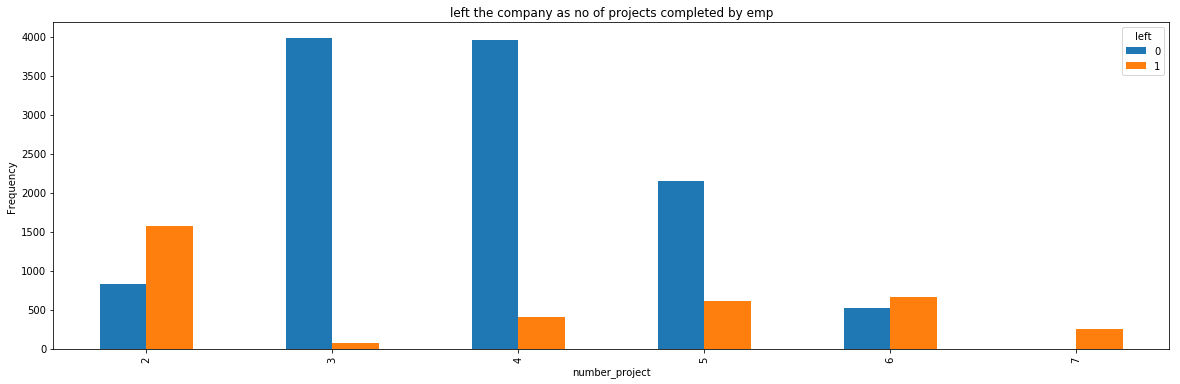

In [29]:
pd.crosstab(HR['number_project'],HR.left).plot(kind="bar",figsize=(20,6))
plt.title('left the company as no of projects completed by emp')
plt.xlabel('number_project')
plt.ylabel('Frequency')
plt.savefig('leftandnoofprojects.png')
plt.show()

# Insight
Emp who have completed only 2 projects & more than 6 projects have been stayed back.
Emp who have complted minimum 3 to 5 project and who has not promoted have left the organization

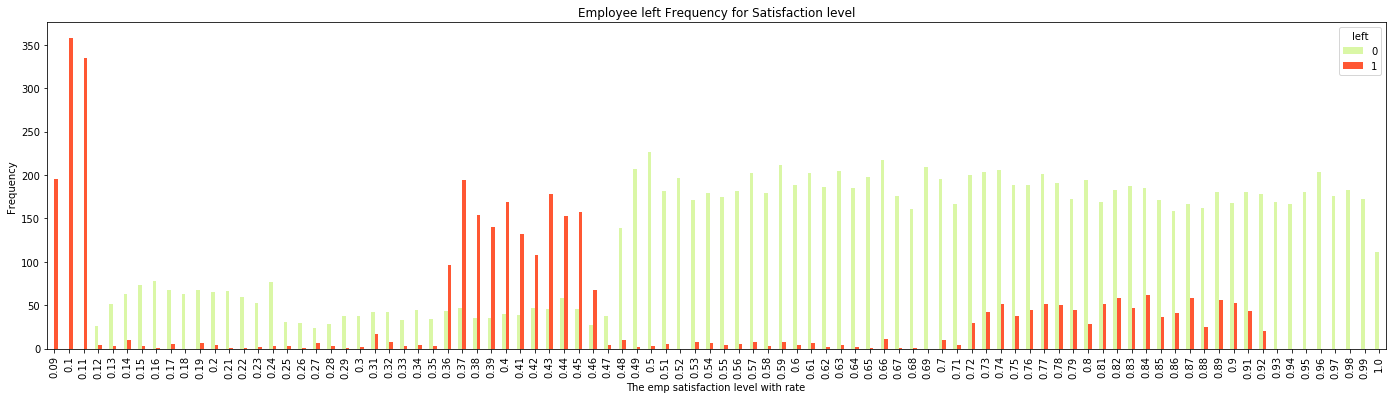

In [33]:
pd.crosstab(HR['satisfaction_level'],HR.left).plot(kind="bar",figsize=(24,6),color=['#DAF7A6','#FF5733' ])
plt.title('Employee left Frequency for Satisfaction level')
plt.xlabel('The emp satisfaction level with rate ')
plt.ylabel('Frequency')
plt.savefig('leftAndsatisfactionlevel.png')
plt.show()

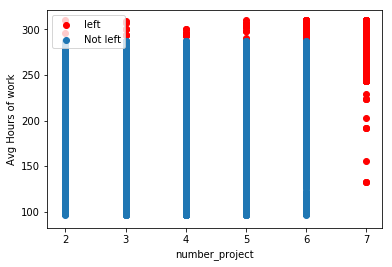

In [36]:
plt.scatter(x=HR['number_project'][HR.left==1], y=HR['average_montly_hours'][(HR.left==1)], c="red")
plt.scatter(x=HR['number_project'][HR.left==0], y=HR['average_montly_hours'][(HR.left==0)])
plt.legend(["left", "Not left"])
plt.xlabel("number_project")
plt.ylabel("Avg Hours of work")
plt.show()

C:\Users\manjunath.d\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\manjunath.d\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


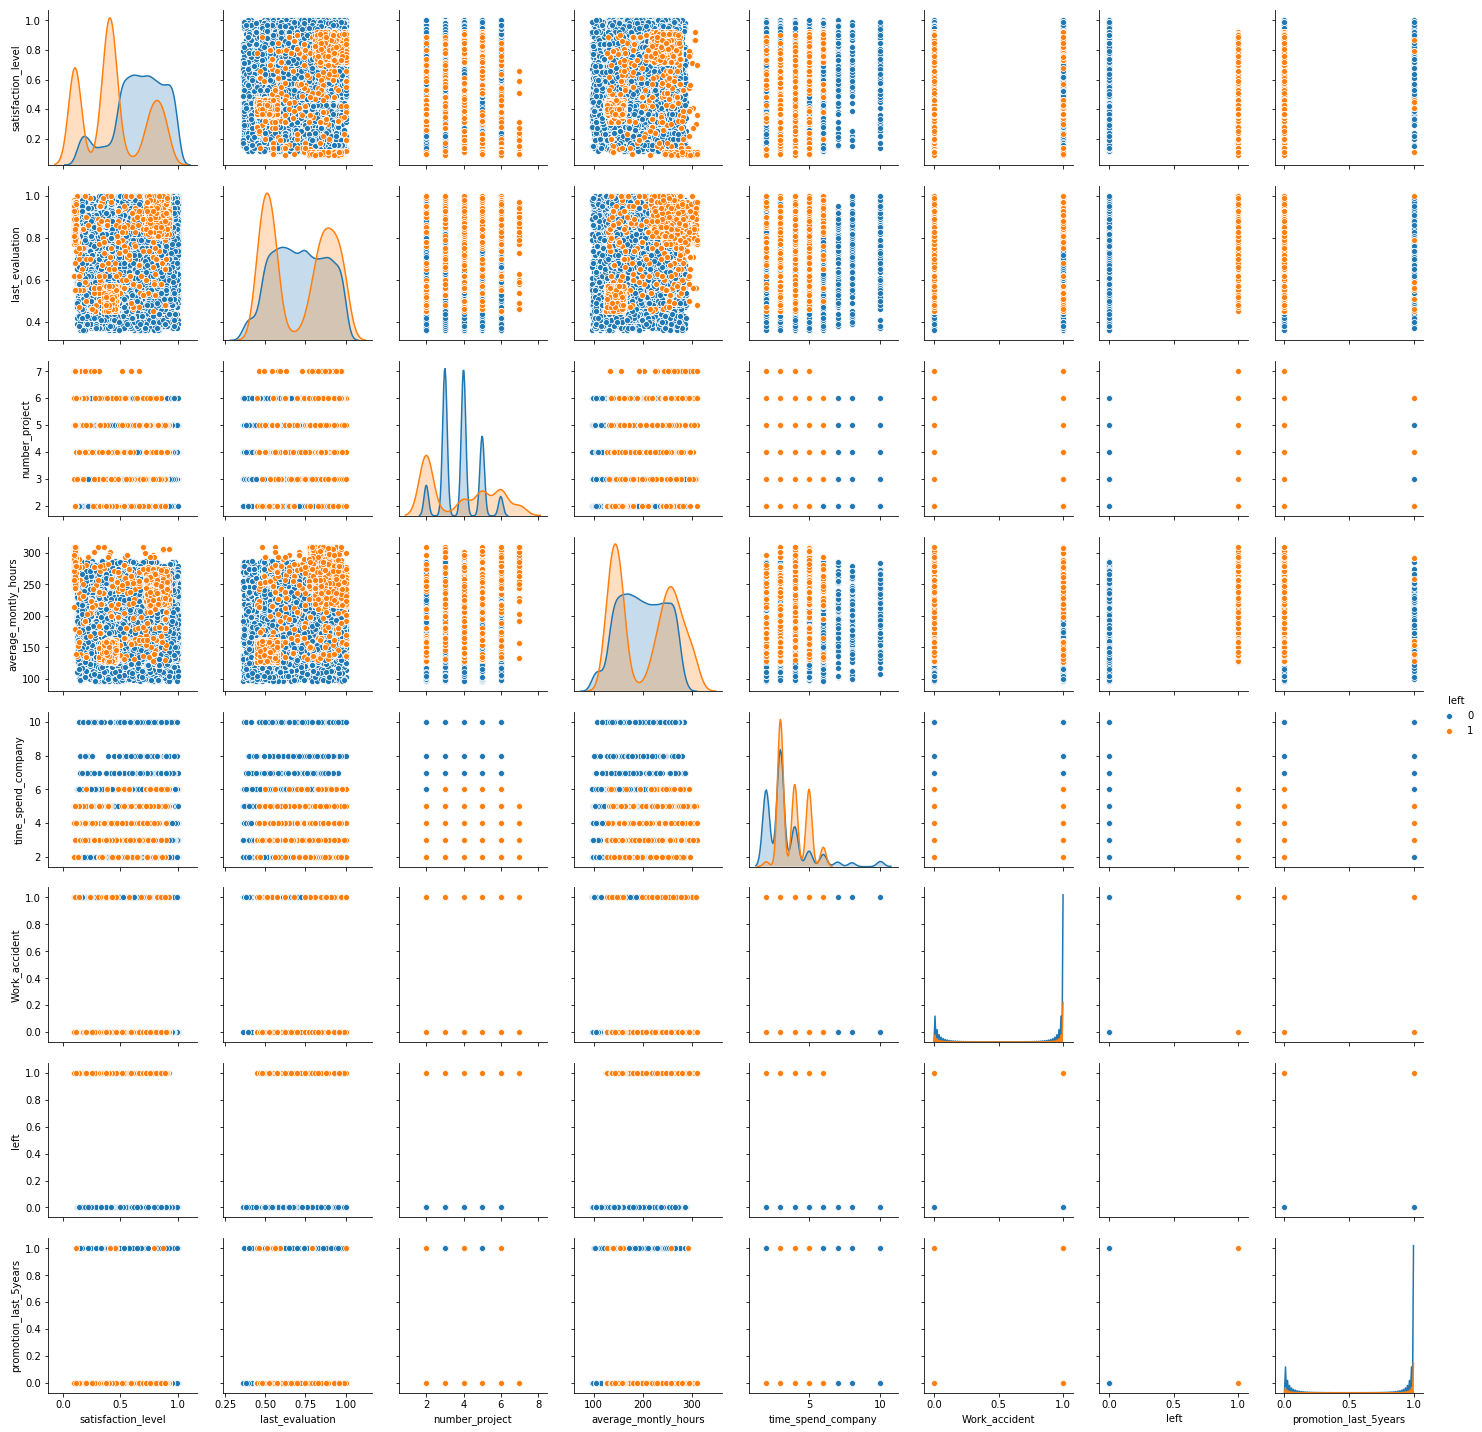

In [11]:
sns.pairplot(HR,hue='left')

# How does the satisfaction level is affected by the emplyee left the company

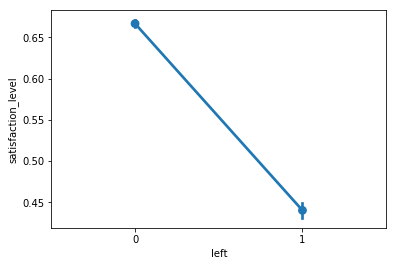

In [13]:
sns.pointplot(y="satisfaction_level", x="left", data=HR)

# Creating dummy varibles for catgorical variable

In [38]:
a = pd.get_dummies(HR['Department'], prefix = "Department")
b = pd.get_dummies(HR['salary'], prefix = "salary")


In [39]:
frames = [HR, a, b]
HR = pd.concat(frames, axis = 1)
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [40]:
HR = HR.drop(columns = ['Department', 'salary'])
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Creating Model for Logistic Regression

In [42]:
y = HR.left.values
x_data = HR.drop(['left'], axis = 1)

In [43]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

## We will split our data. 
80% of our data will be train data and 20% of it will be test data.

In [66]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [47]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [67]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 78.70%


# K-Nearest Neighbour (KNN) Classification¶

Let's see what will be score if we use KNN algorithm.

In [49]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 96.50%


# Support Vector Machine (SVM) Algorithm
Now we will use SVM algorithm.

Support Vector Machine Algorithm

In [50]:
from sklearn.svm import SVC

In [68]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 86.63%


# Naive Bayes Algorithm

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 67.77%


# Decision Tree Algorithm


In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 98.37%


# Random Forest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.10%


In [55]:
# Comparing Models

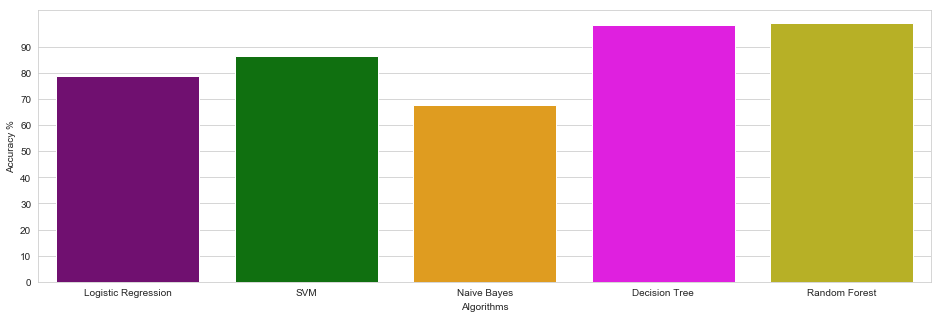

In [56]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### Our models work fine but best of them are Decision Tree and Random Forest with 99.10% of accuracy. Let's look their confusion matrixes.

Confusion Matrix

In [57]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [58]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

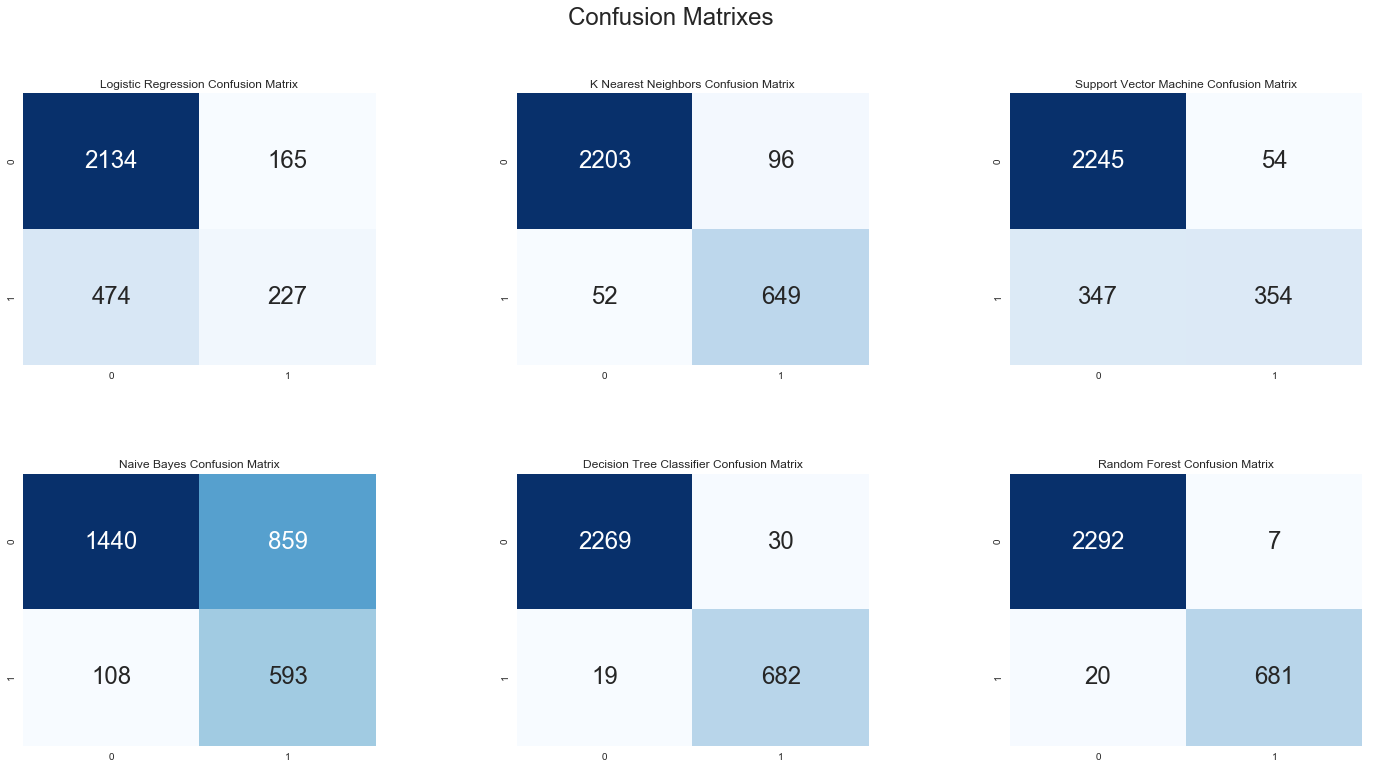

In [60]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()